# K-Nearest Neighbors
***
**Name**: Christina Cleveland

**Worked with**: Maggie Jacoby 
***

This assignment is due on Canvas by **5pm on Wednesday September 19th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.


## Overview 
***


In this homework you'll implement prototype based k-nn and perceptron (with offset = 0) training algorithms using convergence method covered in the class.

Most of this assignment will be done by calling libraries that are already implemented for you. You can use python loops to accomplish most of the implementation, but we would strongly encourage you to use vectorized operations using `numpy` package.

Here are the rules: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function or class API **do not** change it.
- Do not change the location of the data or data directory.  Use only relative paths to access the data. 

### Linear Algebra - 10 points
***
Given matrix:

$$
\begin{equation*}
\mathbf{A} = \begin{bmatrix}2 & -1 & 0\\-1 & 2 & -1\\ 0 & -1 & 2\end{bmatrix}
\end{equation*}
$$

Answer the following questions:

**1.** Are the vectors $\begin{equation*} \mathbf{x} = \begin{bmatrix}2\\-1\\0\end{bmatrix}, \mathbf{y} = \begin{bmatrix}-1 \\ 2 \\ -1\end{bmatrix}, \mathbf{z} = \begin{bmatrix}0 \\ -1 \\2\end{bmatrix} \end{equation*}$ linearly independent? Justify your answer

**Solution Part 1**

If $\mathbf{x}$, $\mathbf{y}$, and $\mathbf{z}$ are linearly dependent then there exists some constants $a,b,c$ that are not all 0 such that
$$\mathbf{0} = a \begin{bmatrix}2\\-1\\0\end{bmatrix} + b \begin{bmatrix}-1 \\ 2 \\ -1\end{bmatrix} + c \begin{bmatrix}0 \\ -1 \\2\end{bmatrix} $$

However the equation above only holds true when $a,b,c = \mathbf{0}$, so the vectors **are** linearly independent

**2.** Find the eigenvalues and the corresponding eigenvectors of $\mathbf{A}$

**Solution Part 2**

$$
\begin{equation*}
\mathbf{A - \lambda I} = \begin{bmatrix}2-\lambda & -1 & 0\\-1 & 2-\lambda & -1\\ 0 & -1 & 2-\lambda\end{bmatrix}
\end{equation*}
$$

$$ det(\mathbf{A - \lambda I}) = \big(2-\lambda\big) \big(\lambda^2-4\lambda + 2\big) $$

Solving for $\lambda$:

$$\boxed{\lambda = 2,\;2 + \sqrt2,\; 2-\sqrt2}$$ 

From the eigenvalues we can solve for the eigenvectors by solving the system of linear equations given by the following, where $\lambda$ is one of the eigenvalues and $\mathbf{v}$ is the respective eigenvector:

$$(\mathbf{A - \lambda I})\mathbf{v} = \mathbf{0}$$

For example, for $\lambda = 2$:

Let $\mathbf{v} = \begin{bmatrix}x_1 \\ x_2 \\ x_3 \end{bmatrix}$, so:

$$\begin{bmatrix}0 & -1 & 0\\-1 & 0 & -1\\ 0 & -1 & 0\end{bmatrix}\begin{bmatrix}x_1 \\ x_2 \\ x_3 \end{bmatrix} = \mathbf{0}$$

We get the following set of linear equations:

$$- x_2 = 0$$

$$-x_1 - x_3 = 0$$

$$-x_2 = 0$$

From these we find:

$$x_3 = - x_1$$
$$x_2 = 0$$

Setting $x_1 = 1$, we get an eigenvector:

$$\mathbf{v} = \begin{bmatrix}1\\0\\-1\end{bmatrix}$$
Solving for each $\lambda$ we get:

$$\boxed{\lambda = 2, \;\mathbf{v} = \begin{bmatrix}1\\0\\-1\end{bmatrix}}$$ 

$$\boxed{\lambda = 2 + \sqrt2,\; \mathbf{v} = \begin{bmatrix}1\\-\sqrt2\\1\end{bmatrix}  }$$ 

$$\boxed{\lambda = 2 - \sqrt2,\; \mathbf{v} = \begin{bmatrix}1\\\sqrt2\\1\end{bmatrix}  }$$ 


**3.** Let $M$ be any matrix with real entries. $M$ is *positive semidefinite* if, for any vector $x$ with real components, the dot product of $Mx$ and $x$ is nonnegative, $\langle Mx, x \rangle \geq 0$

Let $B = \begin{bmatrix}1 & 2\\-2 & 1\end{bmatrix}$. Show that $B$ is positive semidefinite.(i.e., show that $\langle Bx, x \rangle \geq 0$)

**Solution Part 3**

let ${x} = \begin{bmatrix}x\\y\end{bmatrix}$

$${Bx} = \begin{bmatrix} 1 & 2 \\-2 & 1 \end{bmatrix}\begin{bmatrix}x\\y\end{bmatrix} = \begin{bmatrix}x+2y\\-2x+y \end{bmatrix}$$

$$\big<{Bx},{x}\big> = x^2 + 2xy - 2xy + y^2 = x^2 + y^2 $$

The sum of two squares will always be $\geq 0$, so $B$ is positive semidefinite.

**4.** A *symmetric* matrix $H$ is positive semidefinite if and only if the eigenvalues of $H$ are all non-negative. Is matrix $A$ positive semidefinite? Why?

**Solution Part 4**
$$
\begin{equation*}
\mathbf{A^T} = \begin{bmatrix}2 & -1 & 0\\-1 & 2 & -1\\ 0 & -1 & 2\end{bmatrix} = \mathbf{A}
\end{equation*}
$$

So matrix $\mathbf{A}$ is symmetric since it is identical to its transpose. All of the eigenvalues for $\mathbf{A}$ are nonnegative (the smallest eigenvalue is $2-\sqrt2$ which is still greater than 0), so $\mathbf{A}$ is positive semidefinite. 

### Prototype Based K-NN - 10 points
***

In this problem you'll implement a prototype based K-Nearest Neighbor framework to take an image of a handwritten digit and predict which digit it corresponds to.

<br>

![Samples of Handwritten Digits](wide_mnist.png "MNIST Digits")


<br>

In [378]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

The class below will load and store the MNIST data.  Load the data and then report: 
- The number of examples in the training set 
- The number of examples in the test set 
- The number of pixels in each image. 
- Plot the number of data points per class
   

In [401]:
class Numbers:
    """
    Class to store MNIST data
    """
    def __init__(self, location):

        import pickle, gzip

        # load data from file 
        f = gzip.open(location, 'rb')
        train_set, valid_set, test_set = pickle.load(f)
        f.close()

        # store for use later  
        self.train_x, self.train_y = train_set
        self.test_x, self.test_y = valid_set

In [402]:
DATA_PATH = "data/mnist.pklz"
data = Numbers(DATA_PATH)

Number of examples in the training set: 50000
Number of examples in the test set: 10000
Number of pixels in each image: 784


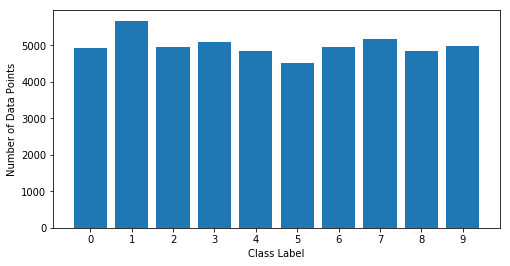

In [403]:
#Data Report Values 
print("Number of examples in the training set:" ,len(data.train_y))

print("Number of examples in the test set:" ,len(data.test_y))

print("Number of pixels in each image:" ,len(data.train_x[0]))
counts = []
for x in range(10):
    counts.append(list(data.train_y).count(x))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
plt.bar(range(10), counts)
plt.xticks(range(10))
plt.xlabel('Class Label')
plt.ylabel('Number of Data Points')
plt.show()

The class below will perform K-Nearest Neighbor classification on our handwritten digit data. Your tasks are as follows:

1. Modify `select_prototypes` method to select `p` random prototypes from training data which will be used for finding `k` nearest neighbors instead of all the training data points.
1. Modify the `label_counts` function to return a dictionary of frequencies corresponding to each label in the training set.
1. Modify the `majority` function so that it returns the _label_ that appears most frequently in the $K$-nearest neighbors of the query point.  In the case that the maximum frequency occurs for two or more labels, return the one that appears most frequently in the entire training set. In the case that there is still a tie, break the tie in any way that you choose.
1. Modify the `confusion_matrix` function to classify examples and record the results in a confusion matrix. You should construct the confusion matrix on your own. Don't call any additional functions from sklearn to do it for you.
1. Modify the `classify` function so that it finds the indices of the $K$ closest training examples to the query point and then calls the `majority` function to return the predicted label. Almost all of the heavy lifting here will be done by the `BallTree` object from sklearn.neighbors, so you'll want to start out by reading the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree.query)

The class Knearest also implements an accuracy function which you will use in subsequent problems. You should not have to modify this function.

In [416]:
class Knearest:
    """
    kNN classifier
    """

    def __init__(self, X, y, k=5, p=10):
        """
        Creates a kNN instance

        :param x: Training data input
        :param y: Training data output
        :param k: The number of nearest points to consider in classification
        :param p: The number of prototypes to choose
        """
        
        from sklearn.neighbors import BallTree
        
        self._p = p
        self._x, self._y = self.select_prototypes(X, y)
        self._labels = list(set(y))
        self._k = k
        self._counts = self.label_counts(y)
        self._kdtree = BallTree(self._x)
            
    def label_counts(self, y):
        """
        Given the training prototypes, return a dictionary d where d[y] is  
        the number of times that label y appears in the training prototypes.
        
        :param y: Training labels input
        """   
        d = {}
        for x in self._labels:
            d[x] = (y == x).sum()
        return d

    def majority(self, neighbor_indices):
        """
        Given the indices of training protypes, return the majority label. Break ties 
        by choosing the tied label that appears most often in the training prototypes. 

        :param neighbor_indices: The indices of the k nearest neighbors
        """
        assert len(neighbor_indices) == self._k, "Did not get k neighbor indices"
        counts = self.label_counts(self._y[neighbor_indices])
        allItems = list(counts.items())
        sorted_by_second = sorted(allItems, key=lambda tup: tup[1], reverse = True)
        maxes = [sorted_by_second[0]]
        for item in sorted_by_second[1:]:
            if item[1] == maxes[0][1]:
                maxes.append(item)
        if len(maxes) > 1:
            ties = sorted([(x[0], self._counts[x[0]]) for x in maxes], key=lambda tup: tup[1], reverse = True)
            ties_maxes = [ties[0]]
            for item in ties[1:]:
                if item[1] == ties_maxes[0][1]:
                    ties_maxes.append(item)
            return np.random.choice([label[0] for label in ties_maxes], 1)
        return sorted_by_second[0][0]
            
    
    def classify(self, example):
        """
        Given an example, return the predicted label.

        :param example: A representation of an example in the same
        format as a row of the training data
        """
        
        dist, ind = self._kdtree.query([example], k = self._k) 
        
        return self.majority(np.array(ind[0]))
        
    def select_prototypes(self, X, y):
        """
        Given the train data, select p random prototypes from data for classification
        calculation.
        
        :param x: Training data input
        :param y: Training data output
        """
        num_data_pts = len(X)
        proto_X = np.array([])
        proto_y = np.array([])
        randProtos = np.random.choice(num_data_pts, self._p, replace = False)
        proto_X = X[randProtos]
        proto_y = y[randProtos]
        return proto_X, proto_y
            
    def confusion_matrix(self, test_x, test_y):
        """
        Given a matrix of test examples and labels, compute the confusion
        matrix for the current classifier.  Should return a 2-dimensional
        numpy array of ints, C, where C[ii,jj] is the number of times an 
        example with true label ii was labeled as jj.

        :param test_x: test data 
        :param test_y: true test labels 
        """

        C = np.zeros((10,10), dtype=int)
        for x, y in zip(test_x, test_y):
            pred_y = self.classify(x)
            C[y][pred_y] += 1
        return C 
            
    @staticmethod
    def accuracy(C):
        """
        Given a confusion matrix C, compute the accuracy of the underlying classifier.
        
        :param C: a confusion matrix 
        """
        
        return np.sum(C.diagonal()) / C.sum()

In [405]:
import unittest

class TestKnn(unittest.TestCase):
    def setUp(self):
        self.x = np.array([[2, 0], [4, 1], [6, 0], [1, 4], [2, 4], [2, 5], [4, 4], [0, 2], [3, 2], [4, 2], [5, 2], [5, 5]])
        self.y = np.array([+1, +1, +1, +1, +1, +1, +1, -1, -1, -1, -1, -1])
        self.knn = {}
        for ii in [1, 2, 3]:
            self.knn[ii] = Knearest(self.x, self.y, ii, len(self.x))

        self.queries = np.array([[1, 5], [0, 3], [6, 4]])
        
    def test0(self):
        """
        Test the label counter 
        """
        self.assertEqual(self.knn[1]._counts[-1], 5)
        self.assertEqual(self.knn[1]._counts[1], 7)

    def test1(self):
        """
        Test 1NN
        """
        self.assertEqual(self.knn[1].classify(self.queries[0]),  1)
        self.assertEqual(self.knn[1].classify(self.queries[1]), -1)
        self.assertEqual(self.knn[1].classify(self.queries[2]), -1)

    def test2(self):
        """
        Test 2NN
        """
        self.assertEqual(self.knn[2].classify(self.queries[0]),  1)
        self.assertEqual(self.knn[2].classify(self.queries[1]),  1)
        self.assertEqual(self.knn[2].classify(self.queries[2]),  1)

    def test3(self):
        """
        Test 3NN
        """
        self.assertEqual(self.knn[3].classify(self.queries[0]),  1)
        self.assertEqual(self.knn[3].classify(self.queries[1]),  1)
        self.assertEqual(self.knn[3].classify(self.queries[2]), -1)
        
tests = TestKnn()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)

....
----------------------------------------------------------------------
Ran 4 tests in 0.014s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

Now, you'll explore the performance of the classifier you've written.

**Part A:** Explore the relationship between the number of training examples and accuracy on the test set. Comment on your findings and support your observations with some kind of plot.

In [406]:
test_p = np.arange(3,13)
accuracies = []
for exp in test_p:
    newKnn = Knearest(data.train_x, data.train_y, k = 5, p = 2**exp)
    accuracies.append(newKnn.accuracy(newKnn.confusion_matrix(data.test_x, data.test_y)))

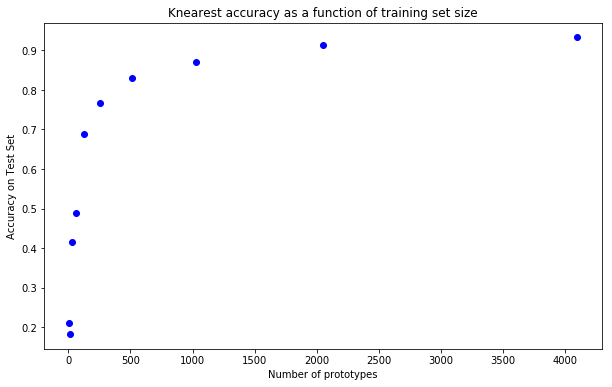

In [408]:
ranges = 2**test_p
fig,ax =  plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plt.plot(ranges, accuracies, 'bo')
plt.xlabel("Number of prototypes")
plt.ylabel("Accuracy on Test Set")
plt.title("Knearest accuracy as a function of training set size")
plt.show();


The accuracy on the test set grows in a way that looks logistic with a clear upper bound of 1, which makes sense since you can't have greater than 100% accuracy. This growth is most dramatic between training set sizes of 0 and 500, roughly 85% of the total accuracy gain is within this range. After this point the accuracy still increases but at a decreasing rate.

**Part B**: Explore the relationship between the number of nearest neighbors and accuracy on the test set. Comment on your findings and support your observations with some kind of plot.

In [443]:
test_k_lowp = np.arange(1,11)
accuracies_k_lowp = []
for kk in test_k_lowp:
    newKnn = Knearest(data.train_x, data.train_y, k = kk, p = 100)
    accuracies_k_lowp.append(newKnn.accuracy(newKnn.confusion_matrix(data.test_x, data.test_y)))
test_k_highp = np.arange(1,101)
accuracies_k_highp = []
for kk in test_k_highp:
    newKnn = Knearest(data.train_x, data.train_y, k = kk, p = 1000)
    accuracies_k_highp.append(newKnn.accuracy(newKnn.confusion_matrix(data.test_x, data.test_y)))

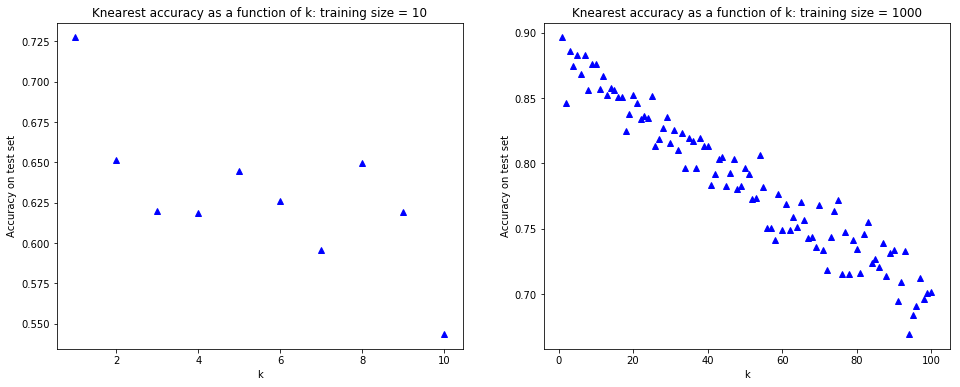

In [448]:
fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.plot(test_k_lowp, accuracies_k_lowp, 'b^')
ax2.plot(test_k_highp, accuracies_k_highp, 'b^')
ax1.set_title("Knearest accuracy as a function of k: training size = 10")
ax2.set_title("Knearest accuracy as a function of k: training size = 1000")
ax1.set_ylabel("Accuracy on test set")
ax2.set_ylabel("Accuracy on test set")
ax1.set_xlabel("k")
ax2.set_xlabel("k")
plt.show();

The accuracy on the test set decreases with increasing k. The maximum accuracy, using the small and large training sizes, occurs at k = 1, although the decrease in accuracy for the larger training set size is only a perecntage point or two between k = 1 and other small k values. The best k is 1, however going up to 3 should be fine for larger training sets and could help avoid overfitting the training data, also it will fully utilize our k nearest neighbor's function as implemented above. It would probably be better to switch to a single nearest neighbor function or to change the tie behavior such that the predicted label is chosen as the label of the single closest neighbor (i.e., drop k down to 1 in the case when there is a tie at k > 1).

**Part C**: Which numbers get confused with each other the most easily?  Use the confusion_matrix function that you wrote above to support your conclusion.  Then use the `view_digit` function given below to plot a few examples of misclassified digits and discuss possible reasons for the misclassifications.  (Investigating misclassified examples is called **error analysis** and is an important step in the development of any classification technique).  

Will analyze misclassifications for training set size of 1000 and 4 different k values: 1,3,5,7. 

In [389]:
def view_digit(example, label=None):
    if label: print("true label: {:d}".format(label))
    plt.imshow(example.reshape(28,28), cmap='gray')
    plt.show();
    

In [488]:
def get_misclass_data(conMatrix):
    misClass_count = {}
    misClass_overpred = {}
    for i in range(10):
        misClass_overpred[i] = 0
    misClass = []
    for i, row in enumerate(conMatrix):
        misClass_count[i] = 0
        for j, x in enumerate(row):
            if i != j:
                misClass.append(((i,j),x))
                misClass_count[i] += x
                misClass_overpred[j] += x
    misClass = sorted(misClass, key=lambda tup: tup[1], reverse = True)
    return misClass, misClass_count, misClass_overpred

In [506]:
conMatrices = []
k_values = [1,3,5,7]
pp =1000
num_data_pts = len(data.train_x)
proto_X = np.array([])
proto_y = np.array([])
randProtos = np.random.choice(num_data_pts, pp, replace = False)
proto_X = data.train_x[randProtos]
proto_y = data.train_y[randProtos]
for kk in k_values:
    kNN_Misclass = Knearest(proto_X, proto_y, k = kk , p = 1000)
    conMatrix = kNN_Misclass.confusion_matrix(data.test_x, data.test_y)
    conMatrices.append(get_misclass_data(conMatrix))

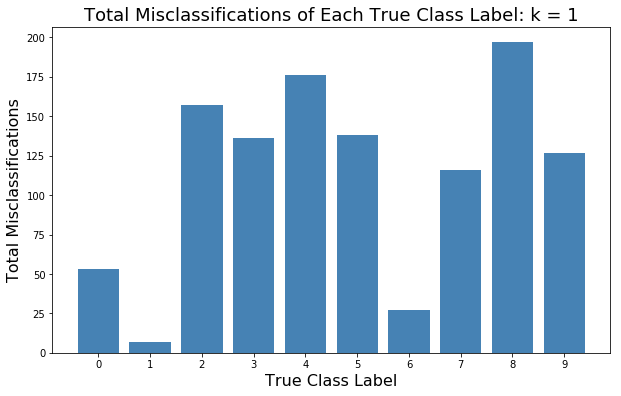

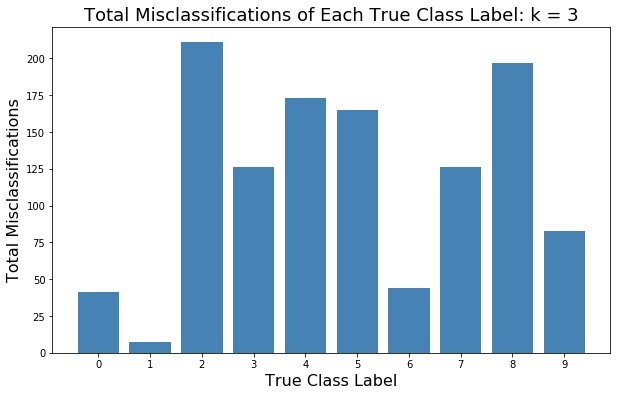

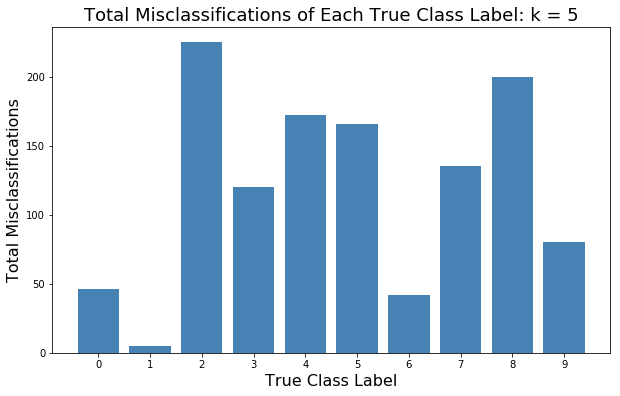

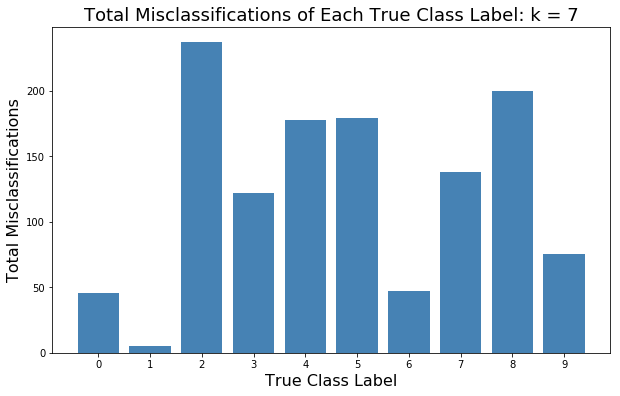

In [507]:
for i,k in enumerate(k_values):
    fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
    plt.bar(conMatrices[i][1].keys(), conMatrices[i][1].values(), color = 'steelblue')
    plt.title("Total Misclassifications of Each True Class Label: k = %i"%k, size = '18')
    plt.xlabel('True Class Label', size = 16)
    plt.ylabel('Total Misclassifications', size = 16)
    plt.xticks(range(10))
    plt.show()

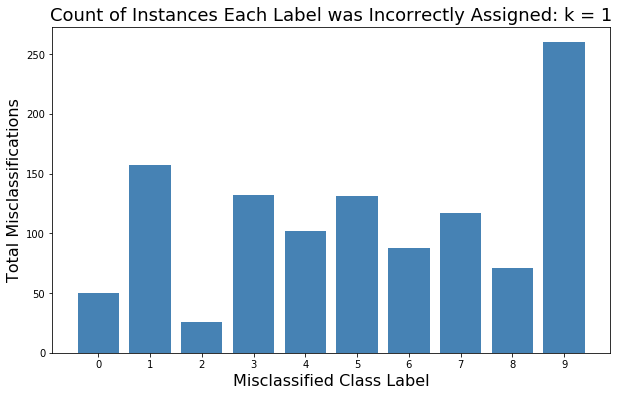

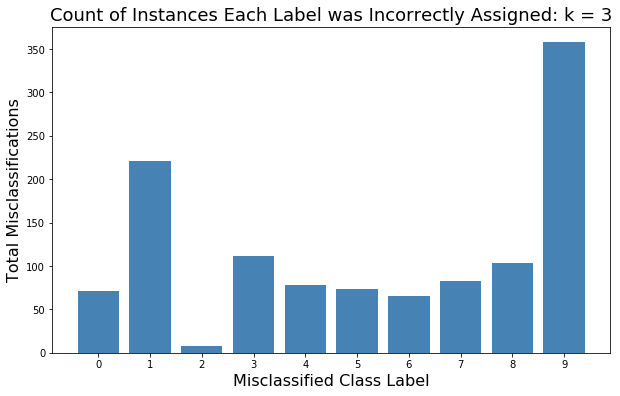

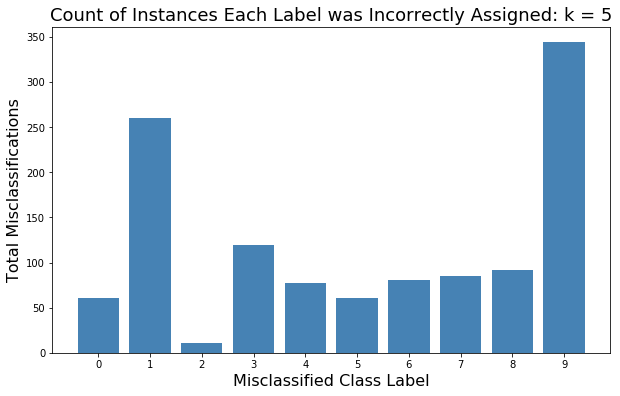

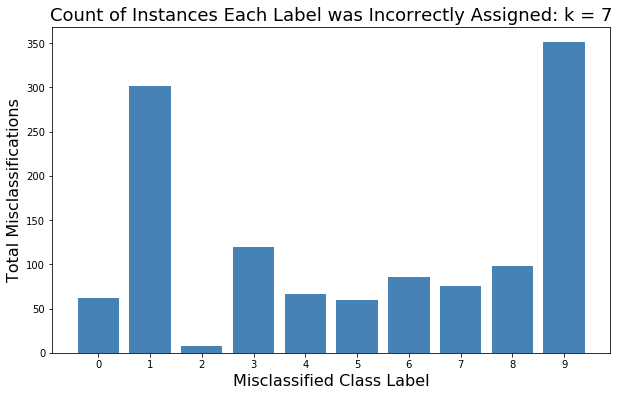

In [508]:
for i,k in enumerate(k_values):
    fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
    plt.bar(conMatrices[i][2].keys(), conMatrices[i][2].values(), color = 'steelblue')
    plt.title("Count of Instances Each Label was Incorrectly Assigned: k = %i"%k, size = '18')
    plt.xlabel('Misclassified Class Label', size = 16)
    plt.ylabel('Total Misclassifications', size = 16)
    plt.xticks(range(10));

For each k nearest classifier trained, certain numbers were often misclassified and other labels were frequently overpredicted. The number of total errors was smallest at k = 1. As k was increased the distribution of the errors changed somewhat as the total number of errors increased. For example, the additional errors as k was increased seemed to occur most for the images with the true label of 2. Increasing k will smooth the boundary between the classes, so it is likely that the class 2 has close boundaries with other labels and so at higher k's the samples at the edges of the 2 class might be misclassified more frequently as other labels even if their single closest neighbor is their true label. Looking at the two sets of plots above, there appears to be a weak inverse relationship for many of the labels between the number of times the label is misclassified and the number of times a misclassified label is the given label. That is, the classifier seems to overlearn certain labels and will overpredict those labels, while other labels are still more ambiguous and will often be confused for other labels, especially as k increases. The strength of this inverse relationship is more apparent as k is increased, thus as the boundaries between classes are further smoothed, as can be seen in the plots below and their respective $R^2$ values when fitting the data to a linear model. 

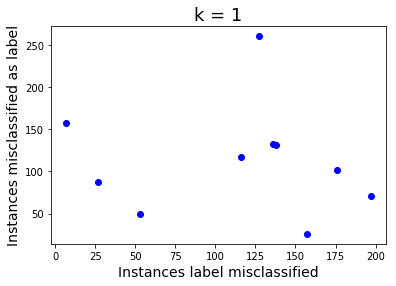

Number of misclassificaitions per label vs number of times misclassified as label R^2 of linear regression:
k = 1, R^2 = 0.010468


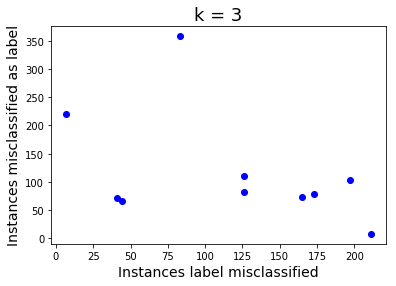

Number of misclassificaitions per label vs number of times misclassified as label R^2 of linear regression:
k = 3, R^2 = 0.197007


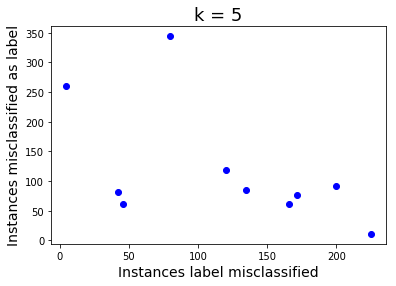

Number of misclassificaitions per label vs number of times misclassified as label R^2 of linear regression:
k = 5, R^2 = 0.295289


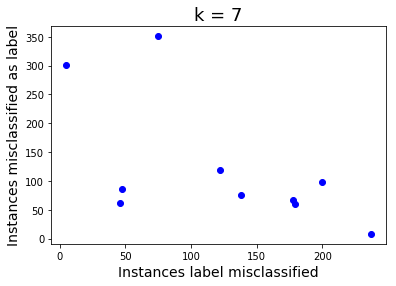

Number of misclassificaitions per label vs number of times misclassified as label R^2 of linear regression:
k = 7, R^2 = 0.367730


In [515]:
from scipy import stats
for i,k in enumerate(k_values):
    plt.plot(conMatrices[i][1].values(),conMatrices[i][2].values(), 'bo')
    plt.title("k = %i"%k, size = '18')
    plt.xlabel('Instances label misclassified', size = 14)
    plt.ylabel('Instances misclassified as label', size = 14)
    plt.show();
    gradient, intercept, r_value, p_value, std_err = stats.linregress(list(conMatrices[i][1].values()),list(conMatrices[i][2].values()))
    print("Number of misclassificaitions per label vs number of times misclassified as label R^2 of linear regression:")
    print("k = %i, R^2 = %f"%(k,r_value**2))

Specific examples of common misclassifications are shown below (for k = 3) and some analysis of these examples might explain the results above. The most common misclassification is when a true label of 4 is labeled as 9. The number four can look like the number 9 very often. Also, there are roughly 4 standard ways to write a number four, whereas there are basically two ways to write a number 9. The 4 is likely frequently misclassified as a 9 because of the similarity and also because the the spread of the training samples for the number for versus the spread of the training samples for the number 9. If the number 9 samples are clustered together more tightly than the numebr four samples in the training set, then 4's on the boundary between the two classes may be misclassified as 9, especially when k is increased because the density of nearby number 4's is lower than that for the nearby number 9's.

Also, the simplicity of certain numbers, like 9 and 1, mean that they are learned more clearly and images that are somewhat ambiguous but contain similar features to 9 and 1 are predicted to be these well-learned classes. The backbone of 1 and 9 is a repeating motif in many different numbers, so it makes sense the classes may have close boundaries to other classes. 

So, it looks like the simplest numbers with the fewest number of representations are better classified than those with more varied representations (so multiple sub-populations per class). To avoid overpredicting certain numbers and to better learn the full range of the more difficult to classify numbers, it may be worthwhile to adjust how the training set of prototypes is sampled from the full training set. Rather than picking the numbers with roughly uniform probablity, it may be valuable to pick with higher probability examples of the hard to classify numbers, *i.e.*, to scale the number of examples in the training set per class with the difficulty of predicting that class and/or the expected number of sub-populations.  

In [479]:
def findExample(true, pred):
    for i, true_y in enumerate(data.test_y):
        if true_y == true:
            pred_y = kNN_Misclass.classify(data.test_x[i])
            if pred_y == pred:
                return data.test_x[i,:], data.test_y[i]


The top 10 misclassification are (k = 3):
True	Predicted	Instance Count
4	9		143
Example:
true label: 4


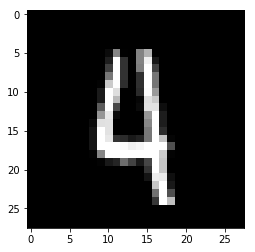

True	Predicted	Instance Count
7	9		71
Example:
true label: 7


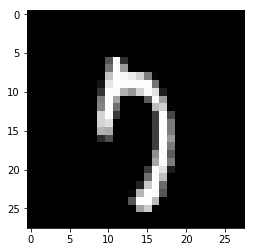

True	Predicted	Instance Count
2	1		65
Example:
true label: 2


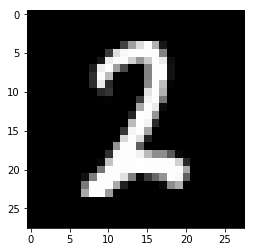

True	Predicted	Instance Count
8	1		53
Example:
true label: 8


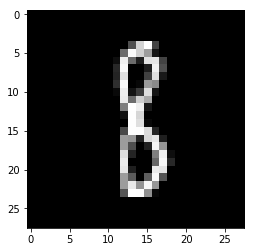

True	Predicted	Instance Count
8	9		49
Example:
true label: 8


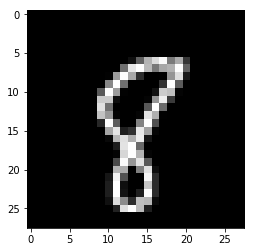

True	Predicted	Instance Count
5	3		48
Example:
true label: 5


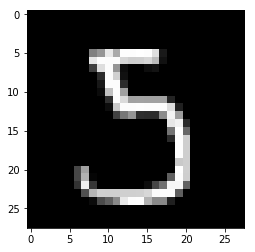

True	Predicted	Instance Count
5	9		41
Example:
true label: 5


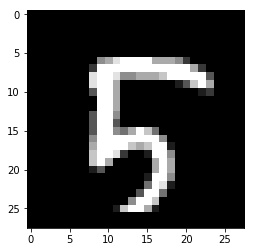

True	Predicted	Instance Count
3	5		40
Example:
true label: 3


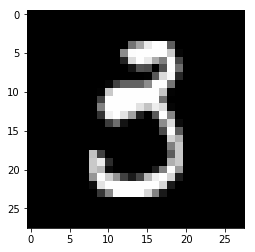

True	Predicted	Instance Count
7	1		39
Example:
true label: 7


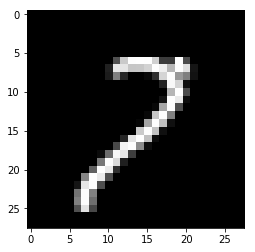

True	Predicted	Instance Count
3	8		36
Example:
true label: 3


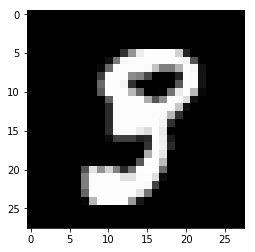

In [513]:
print("The top 10 misclassification are (k = 3):")

for missed in conMatrices[1][0][:10]:
    print("True\tPredicted\tInstance Count")
    print("%i\t%i\t\t%i"%(missed[0][0], missed[0][1], missed[1]))
    print("Example:")
    #print(missed[0][0], missed[0][1])
    example = findExample(missed[0][0], missed[0][1])
    #print(example)
    view_digit(example[0], example[1])
    

**Part D**: Now using the entire training dataset and best value of `k` found from previous analysis, plot test accuracy vs number of prototypes for reasonable values of p (more than 1000). What are the trade-offs you are making when using prototypes instead of all the training examples?

In [481]:
large_p = [10000,30000,50000]
large_p_acc = []
for pp in large_p:
    newKnn = Knearest(data.train_x, data.train_y, k = 3, p = pp )
    large_p_acc.append(newKnn.accuracy(newKnn.confusion_matrix(data.test_x, data.test_y)))
   

In [486]:
all_p = np.append(ranges.copy(),large_p)
all_acc = np.append(accuracies.copy(),large_p_acc)

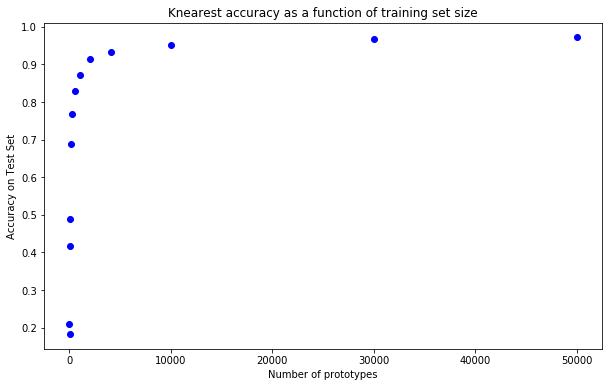

In [487]:
fig,ax =  plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plt.plot(all_p, all_acc, 'bo')
plt.xlabel("Number of prototypes")
plt.ylabel("Accuracy on Test Set")
plt.title("Knearest accuracy as a function of training set size")
plt.show();

As you can see in the above, the greatest accuracy gains occur at low numbers of prototypes. Once you reach protoype set sizes of ~1000, you are already at approximately 90% accuracy on the test set, so the accuracy can only improve by at most 10% even when you include all of the training data, however including all of the training set does yield the highest accuracy on the training set. Using the prototypes instead may be more pragmatic since the depth of the ball tree would be smaller and thus finding the k nearest neighbors is a faster task for the prototypes than for the whole training set. You are trading-off accuracy for efficiency when using the prototypes rather than the whole training set, however, as mentioned, even for large prototype sizes you reach a point of diminishing returns. 

### Perceptron - 10 points
***
Consider the IRIS dataset discussed in lecture. We have created a binary classification problem to determine whether a given flower is a setosa or not. To create this, we pre-processed the labels to create a label vector where setosa’s label is unchanged (i.e. its label is 1), but both versicolor and virginica are now labeled as -1. The data contains two out of the four attributes, petal width and petal length. This training data and the modified labels can be loaded using `IrisM` class. We are going to use this dataset for training a Perceptron classifier in subsequent problems. 
<br>

![Samples of Iris Flowers](wide_iris.png "Iris Dataset")


<br>

In [364]:
class IrisM:
    """
    Class to store modified iris data for Perceptron Training
    """
    
    def __init__(self):
        from sklearn import datasets
        
        iris = datasets.load_iris()
        
        # only taking first two features
        X = iris.data[:, :2]
        y = iris.target[:]
        
        # only considering whether it is setosa or not
        y[iris.target != 0] = -1
        y[iris.target == 0] = 1
        
        mask = np.random.choice(a = [False, True], size = 150, p = (0.66, 1 - 0.66))
        
        self.train_x, self.train_y = X[mask], y[mask]
        self.test_x, self.test_y = X[~mask], y[~mask]
        
        

In [371]:
iris = IrisM()

The class below implements Perceptron classifier in Python on modified IRIS data. The `Peceptron` class implements a Perceptron classifier on a training set of n examples, each of which is  d dimensional vector. The labels for the examples are -1 or 1. This is a simple preceptron classifier seen in class where the linear separator passes through the origin i.e has offset parameter = 0. Your tasks are as following:
1. Implement `train` function which trains a Perceptron classifier on a training set. The function should return $\theta$, the final classification vector and the number of updates performed
1. Implement `predict` function which takes an example as input and returns the predicted label
1. Implement `margin` function which returns geometric margin of the classifier

In [372]:
class Perceptron:
    """
    Perceptron Classifier
    """
    
    def __init__(self, X, y):
        """
        Creates a kNN instance

        :param X: Training data input
        :param y: Training data output
        """
        self._X = X
        self._y = y
        self._theta, self._iter = self.train(X, y)
        
    def train(self, X, y):
        """
        Train perceptron and return final classification vector and
        the number of updates performed respectively
        
        :param X: Training data input
        :param y: Training data output
        """
        indices = np.arange(len(X))
        iters = 0
        prev_iters = -1
        theta = np.array([0]*len(X[0]), dtype = 'float64')
        while iters != prev_iters:
            np.random.shuffle(indices)
            #print(indices)
            prev_iters = iters
            for i in indices:
                y_pred = np.dot(theta,X[i])
                if y_pred == 0:
                    y_pred = -1
                if y[i]*y_pred < 0:
                    #print(X[i], y[i], np.sign(y_pred))
                    theta = theta + y[i]*X[i]
                    iters += 1
                    #print(iters-prev_iters)
        return theta, iters
    
    def predict(self, X):
        """
        Predicts the label for input
        
        :param X: Testing data input
        """
        y_pred = np.dot(self._theta,X)
        if y_pred != 0:
            return np.sign(y_pred)
        return -1
    def margin(self):
        """
        Returns geometric margin of the classifier
        """
        min_margin = float('inf')
        theta_u = np.linalg.norm(self._theta)
        for x in self._X:
            dist = np.abs(np.dot(self._theta, x)/theta_u)
            if dist < min_margin:
                min_margin = dist
        return min_margin
    

In [373]:
import unittest

class TestPerceptron(unittest.TestCase):
    def setUp(self):
        self.x = np.array([[1, 2], [4, 5], [2, 1], [5, 4]])
        self.y = np.array([+1, +1, -1, -1])
        self.perceptron = Perceptron(self.x, self.y)
        self.queries = np.array([[1, 5], [0, 3], [6, 4], [2, 2]])

    def test0(self):
        """
        Test Perceptron
        """
        self.assertEqual(self.perceptron.predict(self.queries[0]),  1)
        self.assertEqual(self.perceptron.predict(self.queries[1]),  1)
        self.assertEqual(self.perceptron.predict(self.queries[2]), -1)
        self.assertEqual(self.perceptron.predict(self.queries[3]), -1)

tests = TestPerceptron()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

Now, we are going to using `IrisM` dataset to train a perceptron using `Perceptron` class.

**Part A:** From class we know that this data is linearly separable but the separator does not pass through the origin. Therefore you will need to follow the technique used in lecture to further pre-process the data to be linearly separable through the origin: for each data point, add an additional feature, set to a constant value (please use the value 1 for consistency). Then, use the `Perceptron` class to train a Perceptron classifier.

In [374]:
newX = []
for x in iris.train_x:
    vals = np.append(x,1)
    newX.append(vals)
irisClass = Perceptron(np.array(newX), iris.train_y)

**Part B:** What is the angle between Perceptron's classification vector and vector $(1, 0)^T$? Report number of iterations to converge and the accuracy on test set.

In [407]:
x = np.array([1,0,1])
theta_u = irisClass._theta/np.linalg.norm(irisClass._theta)
x_u = x/np.linalg.norm(x)
currAng =  np.arccos(np.clip(np.dot(theta_u, x_u), -1.0, 1.0))
print("Angle between theta and vector (1,0,1): %.2f radians"%currAng)
print("Number of iterations: %i"%irisClass._iter)
newtestX = []
for x in iris.test_x:
    vals = np.append(x,1)
    newtestX.append(vals)
newtestX = np.array(newtestX)
correct = 0
for x,y in zip(newtestX, iris.test_y):
    correct += (irisClass.predict(x) == y)
accuracy = (correct/len(iris.test_y))
print("Percent accuracy on test set: {0:.0%}".format(accuracy))

Angle between theta and vector (1,0,1): 1.85 radians
Number of iterations: 45
Percent accuracy on test set: 99%


**Part C:** Compute the geometric margins of your classifier with respect to the `IrisM` dataset used. Recall that the distance of a point from $x_t$ from the line $\theta^T x = 0$ is $\frac{\theta^Tx_t}{||x||}$

In [376]:
margin = irisClass.margin()
print("Geometric margin of classifier: %f"%margin)

Geometric margin of classifier: 0.111729
